In [153]:
# some notes

# monthly buying basis still has WEEKLY entries in COST
# Impression -> Open -> Click [For EMAILS]

# GOOGLE AD SENSE ONLY IN GERMANY, NORWAY AND UK.
# Phrase Match: Include meaning of keyword
# Exact Match: Same meaning of Keyword

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)


# TODO: 
# Find out how to plot each of the AdTypes by Impressions vs Week and have it sum to total impressions 

In [6]:
# Cleaning
df = pd.read_csv("dataset/Advertising.csv", low_memory = False, usecols = lambda c: not c.startswith("Unnamed:"), parse_dates = ['Week'])
df['Year'] = pd.DatetimeIndex(df['Week']).year
df['Month'] = pd.DatetimeIndex(df['Week']).month
df['Num_Week'] = pd.DatetimeIndex(df['Week']).weekofyear
df["BuyingBasis"].replace('instance', 'Instance', inplace = True)
# filling null values for engagement and impressions
df['Engagement'] = df['Engagement'].fillna(0)
df['Impressions'] = df['Impressions'].fillna(0)

df['AdType'].unique()


# num_week gives warning but im not sure what it means yet to be honest

/tmp/ipykernel_130/2634263368.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['Num_Week'] = pd.DatetimeIndex(df['Week']).weekofyear


array(['Email', 'Display', 'Content syndication', 'Social email ',
       'Social media', 'Programmatic', 'Google Ad Words'], dtype=object)

['Germany' 'Norway' 'United Kingdom']


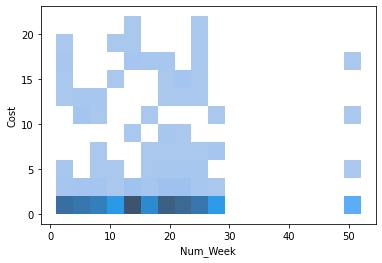

1453 944 2780
['IT UPS 2017' 'IT Power Distribution 17' 'IT Power manag 17'
 'IT Data Centre Infra 17' 'IT UPS maintenance 17'
 'IT Downtime protection 17']
            Week  Impressions  Clicks  Engagement  Opens  Leads     Segment  \
11538 2017-07-02          0.0      13         0.0      0      0  Commercial   
11550 2017-04-09        145.0      10         0.0      0      0  Commercial   

               Season CountryISO     CountryName           Region SubRegion  \
11538  LED-compliance         gb  United Kingdom  Northern Europe    UK & I   
11550  LED-compliance         gb  United Kingdom  Northern Europe    UK & I   

                Publication           AdType     Treatment BuyingBasis  Cost  \
11538  lighting regulations  Google Ad Words  Phrase match         CPC  22.0   
11550  lighting regulations  Google Ad Words  Phrase match         CPC  20.0   

       Year  Month  Num_Week  
11538  2017      7        26  
11550  2017      4        14  


In [54]:
# Looking at GoogleAdSense Data by Countrty

df_google = df.copy() 
df_google = df.loc[df['AdType'] == 'Google Ad Words']


#df_google.head(5)

#ad sense is cost per click so the clicks -> price graphs should look identical

print(df_google['CountryName'].unique())

df_google_ge = df_google.loc[df['CountryName'] == 'Germany']
df_google_uk = df_google.loc[df['CountryName'] == 'United Kingdom']
df_google_nw = df_google.loc[df['CountryName'] == 'Norway']

sns.histplot(x = df_google_uk['Num_Week'], y = df_google_uk["Cost"])
plt.show()


# looking at entries per country (market)
# Germany: 1453 (IT Channel) [ALl Marketing Campaigns target IT related issues]
# UK: 944 (Commercial)
# Norway: 2780 (Residential) [Only one to mention the company EATON]

# All these are tergetting different markets, feels kind of silly to compare them.

print(len(df_google_ge), len(df_google_uk), len(df_google_nw))



#print(df_google_uk["Segment"].unique())
#print(df_google_uk["Season"].unique())

# This is probably the word that is being targeted
#print(df_google_uk["Publication"].unique()) 
#print(df_google_ge["Publication"].unique()) 
#print(df_google_nw["Publication"].unique()) 

print(df_google_ge["Season"].unique())




print(df_google_uk.head(2))

# Are there campaigns that use Google Ad Sense AND other types of ads? 





In [56]:
df_LED = df.loc[df["Season"] == "IT Data Centre Infra 17"]

# ONLY Google Ad Words? Feels like they have individual Campaigns for google ads that are REGION locked? 
print(df_LED["AdType"].unique())
print(df_LED["CountryName"].unique())



df_LED.head(5)

# Sorting to steal later
#print(df_country[['Clicks', 'Cost', 'Treatment']].sort_values(by = ['Cost']))

['Google Ad Words']
['Germany']


,Week,Impressions,Clicks,Engagement,Opens,Leads,Segment,Season,CountryISO,CountryName,Region,SubRegion,Publication,AdType,Treatment,BuyingBasis,Cost,Year,Month,Num_Week
11502,2017-05-29,592.0,9,0.0,0,0,IT Channel,IT Data Centre Infra 17,de,Germany,Western Europe,DACH,it infrastruktur,Google Ad Words,Phrase match,CPC,31.0,2017,5,22
11521,2017-08-07,403.0,8,0.0,0,0,IT Channel,IT Data Centre Infra 17,de,Germany,Western Europe,DACH,it infrastruktur,Google Ad Words,Phrase match,CPC,24.0,2017,8,32
11525,2017-09-04,384.0,9,0.0,0,0,IT Channel,IT Data Centre Infra 17,de,Germany,Western Europe,DACH,it infrastruktur,Google Ad Words,Phrase match,CPC,24.0,2017,9,36
11570,2017-08-21,303.0,7,0.0,0,0,IT Channel,IT Data Centre Infra 17,de,Germany,Western Europe,DACH,it infrastruktur,Google Ad Words,Phrase match,CPC,18.0,2017,8,34
11575,2017-07-10,458.0,7,0.0,0,0,IT Channel,IT Data Centre Infra 17,de,Germany,Western Europe,DACH,it infrastruktur,Google Ad Words,Phrase match,CPC,17.0,2017,7,28
